<a href="https://colab.research.google.com/github/Hemanth9336/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.24 s (started: 2021-08-29 07:41:24 +00:00)


In [55]:
!pip install bing-image-downloader

time: 3.24 s (started: 2021-08-29 07:41:27 +00:00)


In [56]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists
time: 130 ms (started: 2021-08-29 07:41:30 +00:00)


In [57]:
from bing_image_downloader import downloader
downloader.download("dog",limit = 30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/dog


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.reddogwa.com/yahoo_site_admin/assets/images/red-dog--true-blue-2016-large-cover.169221152_large.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i1.wp.com/janksreviews.com/wp-content/uploads/2016/12/red-dog-1.jpg?fit=1000%2C563
[%] File Downloaded !

[%] Downloading Image #3 from https://www.dvdsreleasedates.com/posters/800/R/Red-Dog-True-Blue-2016-movie-poster.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://reddogwa.com/yahoo_site_admin/assets/images/Phoenix.169221105_large.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://mrmoviefilmblog.files.wordpress.com/2016/12/red-dog-true-blue-002.jpg?w=1200
[%] File Downloaded !

[%] Downloading Image #6 from https://d1mm3624z6jafc.cloudfront.net/movies/posters/Red_Dog_True_Blue_700x1000_LR.jpg?v=12&amp;width=1600&amp;height=900&amp;scale=both&amp;mode=

In [58]:
from bing_image_downloader import downloader
downloader.download("lion",limit = 30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/lion


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://1.bp.blogspot.com/-WeQqykyLQJE/UOFwCsUW4JI/AAAAAAAAEmY/aPSDjWS111E/s1600/African-Lion.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://compassioncircle.com/wp-content/uploads/2011/07/Lion_Lamb2.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ytimg.com/vi/_q_uxTIG0-U/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i1.treknature.com/photos/11474/dsc_0774b.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/ae/67/66/ae67661bfdc55bece8ffb29efdf4d469.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/2c/40/7c/2c407ca75acaf99463bf1dcf80f984bf.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.pinimg.com/originals/6e/0c/34/6e0c34456bbb191c9f8c2d578019f883.jpg
[%] File Downloaded !

[%] Downloading Ima

In [78]:
#Preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['lion','dog']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 13.8 s (started: 2021-08-29 08:20:36 +00:00)


In [60]:
flat_data

array([[0.03921569, 0.14509804, 0.25882353, ..., 0.19052288, 0.01372549,
        0.00784314],
       [0.76652688, 0.86052183, 0.72823425, ..., 0.99593063, 0.99159076,
        0.97986928],
       [0.43056993, 0.26978562, 0.15568627, ..., 0.42915033, 0.16328627,
        0.01311634],
       ...,
       [0.37989542, 0.18845752, 0.09775163, ..., 0.7594902 , 0.64576471,
        0.51941176],
       [0.25481046, 0.22735948, 0.19245752, ..., 0.63882353, 0.59084967,
        0.46113725],
       [0.93943791, 0.9545098 , 0.95067974, ..., 0.67964706, 0.57346405,
        0.53303268]])

time: 5.64 ms (started: 2021-08-29 07:42:25 +00:00)


In [61]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 5 ms (started: 2021-08-29 07:42:25 +00:00)


<BarContainer object of 2 artists>

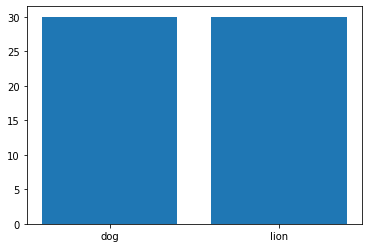

time: 203 ms (started: 2021-08-29 07:42:25 +00:00)


In [62]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=102)

time: 14.2 ms (started: 2021-08-29 07:42:25 +00:00)


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 44.6 s (started: 2021-08-29 07:42:25 +00:00)


In [65]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

time: 83.6 ms (started: 2021-08-29 07:43:10 +00:00)


In [66]:
y_test

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

time: 3.81 ms (started: 2021-08-29 07:43:10 +00:00)


In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.65 ms (started: 2021-08-29 07:43:10 +00:00)


In [68]:
accuracy_score(y_pred,y_test)

0.6666666666666666

time: 4.81 ms (started: 2021-08-29 07:43:10 +00:00)


In [69]:
confusion_matrix(y_pred,y_test)

array([[5, 0],
       [6, 7]])

time: 5.03 ms (started: 2021-08-29 07:43:10 +00:00)


In [70]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 37 ms (started: 2021-08-29 07:43:10 +00:00)


In [71]:
model = pickle.load(open('img_model.p','rb'))

time: 13.7 ms (started: 2021-08-29 07:43:10 +00:00)


Enter your URLhttps://media.vanityfair.com/photos/5d2750b1abb5c9000873bced/2:3/w_775,h_1163,c_limit/lion-king-review.jpg
(1163, 775, 3)
 PREDICTED OUTPUT: lion


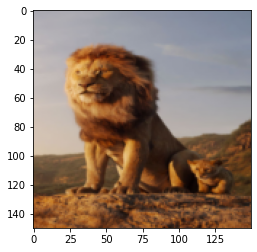

time: 3.34 s (started: 2021-08-29 08:24:36 +00:00)


In [84]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')